In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# OB ATAC-seq data

In [9]:
OB_atac = pd.read_csv('/mnt/10T-backup-mingju/ifar/ATAC_seq/hMSC/hMSC_Day15/atac_pipeline_results/idr.optimal_peak.narrowPeak_w_header.bed',sep='\t')

In [10]:
OB_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443
1,chr17,22521174,22521670,.,1000,.,32.52792,4342.99219,4335.18262,51
2,chr17,22521174,22521670,.,1000,.,28.01845,3521.63037,3514.02026,383
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749
4,chr1,629089,630012,.,1000,.,6.84056,2452.44165,2445.36890,593
...,...,...,...,...,...,...,...,...,...,...
220818,chr2,98757568,98758658,.,1000,.,3.79591,11.18936,9.23750,397
220819,chr12,106902963,106903961,.,1000,.,3.79591,11.18936,9.23750,198
220820,chr10,73836876,73837908,.,701,.,3.79591,11.18936,9.23750,141
220821,chr1,234486873,234487822,.,1000,.,3.79591,11.18936,9.23750,902


In [11]:
OB_atac['index'] = OB_atac['Chr'] + ":" + OB_atac['Start'].astype(str) + "-" + OB_atac['End'].astype(str)

In [12]:
OB_atac['ATAC_OB'] = "ATAC-seq:" + OB_atac['Chr'] + ":" + OB_atac['Start'].astype(str) + "-" + OB_atac['End'].astype(str)

In [13]:
OB_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_OB
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
1,chr17,22521174,22521670,.,1000,.,32.52792,4342.99219,4335.18262,51,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
2,chr17,22521174,22521670,.,1000,.,28.01845,3521.63037,3514.02026,383,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749,chr1:629089-630012,ATAC-seq:chr1:629089-630012
4,chr1,629089,630012,.,1000,.,6.84056,2452.44165,2445.36890,593,chr1:629089-630012,ATAC-seq:chr1:629089-630012
...,...,...,...,...,...,...,...,...,...,...,...,...
220818,chr2,98757568,98758658,.,1000,.,3.79591,11.18936,9.23750,397,chr2:98757568-98758658,ATAC-seq:chr2:98757568-98758658
220819,chr12,106902963,106903961,.,1000,.,3.79591,11.18936,9.23750,198,chr12:106902963-106903961,ATAC-seq:chr12:106902963-106903961
220820,chr10,73836876,73837908,.,701,.,3.79591,11.18936,9.23750,141,chr10:73836876-73837908,ATAC-seq:chr10:73836876-73837908
220821,chr1,234486873,234487822,.,1000,.,3.79591,11.18936,9.23750,902,chr1:234486873-234487822,ATAC-seq:chr1:234486873-234487822


In [15]:
OB_atac_uniq = OB_atac.drop_duplicates(subset="index", keep='first')

In [16]:
OB_atac_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_OB
0,chr17,22521174,22521670,.,1000,.,33.87889,4586.68848,4578.77734,443,chr17:22521174-22521670,ATAC-seq:chr17:22521174-22521670
3,chr1,629089,630012,.,1000,.,7.11375,2651.48804,2644.27124,749,chr1:629089-630012,ATAC-seq:chr1:629089-630012
6,chr1,633702,634241,.,1000,.,6.22328,2097.01245,2090.13623,407,chr1:633702-634241,ATAC-seq:chr1:633702-634241
8,chr1,632167,633002,.,1000,.,4.96612,1366.64844,1360.09045,615,chr1:632167-633002,ATAC-seq:chr1:632167-633002
12,chr20,13167279,13167385,.,1000,.,69.84298,986.39697,979.99268,54,chr20:13167279-13167385,ATAC-seq:chr20:13167279-13167385
...,...,...,...,...,...,...,...,...,...,...,...,...
217274,chr12,25764438,25764665,.,897,.,3.64533,11.67091,9.70506,117,chr12:25764438-25764665,ATAC-seq:chr12:25764438-25764665
219346,chr6,33416850,33417039,.,997,.,2.33157,11.40841,9.45192,34,chr6:33416850-33417039,ATAC-seq:chr6:33416850-33417039
220103,chr10,44386960,44387033,.,999,.,2.25730,11.29247,9.33841,46,chr10:44386960-44387033,ATAC-seq:chr10:44386960-44387033
220125,chr10,109852175,109852277,.,933,.,4.18072,11.28931,9.33531,53,chr10:109852175-109852277,ATAC-seq:chr10:109852175-109852277


# OB DNase

In [17]:
OB_DNase = pd.read_csv('/mnt/10T-backup-mingju/ifar/DNase_seq/osteoblast/ENCFF012SEI_w_header.bed',sep='\t')

In [18]:
OB_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75


In [19]:
OB_DNase['index'] = OB_DNase['Chr'] + ":" + OB_DNase['Start'].astype(str) + "-" + OB_DNase['End'].astype(str)

In [20]:
OB_DNase['DNase_OB'] = "DNase-seq:" + OB_DNase['Chr'] + ":" + OB_DNase['Start'].astype(str) + "-" + OB_DNase['End'].astype(str)

In [21]:
OB_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_OB
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75,chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75,chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75,chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75,chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75,chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75,chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75,chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75,chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75,chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [22]:
OB_DNase_uniq = OB_DNase.drop_duplicates(subset="index", keep='first')

In [23]:
OB_DNase_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_OB
0,chr1,181081,181231,.,0,.,13.0,-1,-1,75,chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1,181375,181525,.,0,.,124.0,-1,-1,75,chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1,191415,191565,.,0,.,52.0,-1,-1,75,chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1,608477,608627,.,0,.,35.0,-1,-1,75,chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1,608627,608777,.,0,.,26.0,-1,-1,75,chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...,...,...,...,...,...
952127,chrY,56849275,56849425,.,0,.,19.0,-1,-1,75,chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
952128,chrY,56849425,56849575,.,0,.,21.0,-1,-1,75,chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
952129,chrY,56870855,56871005,.,0,.,38.0,-1,-1,75,chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
952130,chrY,56873635,56873785,.,0,.,30.0,-1,-1,75,chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [24]:
merge_atac_dnase = pd.merge(OB_atac_uniq[['index','Chr','Start','End','ATAC_OB']], OB_DNase_uniq[['index','DNase_OB']], on='index', how='outer')

In [25]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB
0,chr10:100001860-100002010,NaN,NaN,NaN,NaN,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,NaN,NaN,NaN,NaN,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,chr10,100006040.0,100006766.0,ATAC-seq:chr10:100006040-100006766,NaN
3,chr10:100006455-100006605,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,NaN,NaN,NaN,NaN,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,NaN,NaN,NaN,NaN,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,NaN,NaN,NaN,NaN,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,NaN,NaN,NaN,NaN,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,chrY,9141863.0,9141992.0,ATAC-seq:chrY:9141863-9141992,NaN


In [26]:
merge_atac_dnase["OpenChromatin_OB"] = merge_atac_dnase.apply(
    lambda row: f"{row['ATAC_OB']};{row['DNase_OB']}" if pd.notna(row['ATAC_OB']) and pd.notna(row['DNase_OB']) and row['DNase_OB'] != ""
                else row['ATAC_OB'] if pd.notna(row['ATAC_OB'])
                else row['DNase_OB'] if pd.notna(row['DNase_OB']) and row['DNase_OB'] != ""
                else "", 
    axis=1
)

In [27]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr10:100001860-100002010,NaN,NaN,NaN,NaN,DNase-seq:chr10:100001860-100002010,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,NaN,NaN,NaN,NaN,DNase-seq:chr10:100004897-100005047,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,chr10,100006040.0,100006766.0,ATAC-seq:chr10:100006040-100006766,NaN,ATAC-seq:chr10:100006040-100006766
3,chr10:100006455-100006605,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006455-100006605,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,NaN,NaN,NaN,NaN,DNase-seq:chr10:100007235-100007385,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,NaN,NaN,NaN,NaN,DNase-seq:chrY:8781649-8781799,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,NaN,NaN,NaN,NaN,DNase-seq:chrY:8940235-8940385,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,NaN,NaN,NaN,NaN,DNase-seq:chrY:9018435-9018585,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,chrY,9141863.0,9141992.0,ATAC-seq:chrY:9141863-9141992,NaN,ATAC-seq:chrY:9141863-9141992


In [28]:
def parse_index(index_str):
    if pd.isna(index_str) or index_str == "NaN":
        return pd.NA, pd.NA, pd.NA
    chr_part, range_part = index_str.split(":")
    chr_value = chr_part.replace("chr", "")
    start, end = range_part.split("-")
    return chr_value, pd.to_numeric(start), pd.to_numeric(end)

In [29]:
merge_atac_dnase[['Chr', 'Start', 'End']] = merge_atac_dnase['index'].apply(lambda x: pd.Series(parse_index(x)))

In [30]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr10:100001860-100002010,10,100001860,100002010,NaN,DNase-seq:chr10:100001860-100002010,DNase-seq:chr10:100001860-100002010
1,chr10:100004897-100005047,10,100004897,100005047,NaN,DNase-seq:chr10:100004897-100005047,DNase-seq:chr10:100004897-100005047
2,chr10:100006040-100006766,10,100006040,100006766,ATAC-seq:chr10:100006040-100006766,NaN,ATAC-seq:chr10:100006040-100006766
3,chr10:100006455-100006605,10,100006455,100006605,NaN,DNase-seq:chr10:100006455-100006605,DNase-seq:chr10:100006455-100006605
4,chr10:100007235-100007385,10,100007235,100007385,NaN,DNase-seq:chr10:100007235-100007385,DNase-seq:chr10:100007235-100007385
...,...,...,...,...,...,...,...
1017491,chrY:8781649-8781799,Y,8781649,8781799,NaN,DNase-seq:chrY:8781649-8781799,DNase-seq:chrY:8781649-8781799
1017492,chrY:8940235-8940385,Y,8940235,8940385,NaN,DNase-seq:chrY:8940235-8940385,DNase-seq:chrY:8940235-8940385
1017493,chrY:9018435-9018585,Y,9018435,9018585,NaN,DNase-seq:chrY:9018435-9018585,DNase-seq:chrY:9018435-9018585
1017494,chrY:9141863-9141992,Y,9141863,9141992,ATAC-seq:chrY:9141863-9141992,NaN,ATAC-seq:chrY:9141863-9141992


In [31]:
# Define the chromosome order: 1 to 22, X, Y
chr_order = [str(i) for i in range(1, 23)] + ["X", "Y"]

# Convert Chr to categorical with the specified order
merge_atac_dnase["Chr"] = pd.Categorical(merge_atac_dnase["Chr"], categories=chr_order, ordered=True)

# Sort by Chr and Start
merge_atac_dnase_sorted = merge_atac_dnase.sort_values(by=["Chr", "Start"])

In [32]:
merge_atac_dnase_sorted.reset_index(drop=True)

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
0,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
1,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
2,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
3,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
4,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
1017491,chrY:56849275-56849425,Y,56849275,56849425,NaN,DNase-seq:chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
1017492,chrY:56849425-56849575,Y,56849425,56849575,NaN,DNase-seq:chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
1017493,chrY:56870855-56871005,Y,56870855,56871005,NaN,DNase-seq:chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
1017494,chrY:56873635-56873785,Y,56873635,56873785,NaN,DNase-seq:chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [33]:
merge_atac_dnase_sorted.head(100)

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
414187,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
414376,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
417352,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
465765,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
465774,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
476703,chr1:931863-932013,1,931863,932013,NaN,DNase-seq:chr1:931863-932013,DNase-seq:chr1:931863-932013
477088,chr1:938435-938585,1,938435,938585,NaN,DNase-seq:chr1:938435-938585,DNase-seq:chr1:938435-938585
477140,chr1:939215-939365,1,939215,939365,NaN,DNase-seq:chr1:939215-939365,DNase-seq:chr1:939215-939365
477155,chr1:939690-939840,1,939690,939840,NaN,DNase-seq:chr1:939690-939840,DNase-seq:chr1:939690-939840


In [34]:
merge_atac_dnase_sorted[merge_atac_dnase_sorted['ATAC_OB'].notna()&merge_atac_dnase_sorted['DNase_OB'].notna()]

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB


In [35]:
merge_atac_dnase_sorted

,index,Chr,Start,End,ATAC_OB,DNase_OB,OpenChromatin_OB
414187,chr1:181081-181231,1,181081,181231,NaN,DNase-seq:chr1:181081-181231,DNase-seq:chr1:181081-181231
414376,chr1:181375-181525,1,181375,181525,NaN,DNase-seq:chr1:181375-181525,DNase-seq:chr1:181375-181525
417352,chr1:191415-191565,1,191415,191565,NaN,DNase-seq:chr1:191415-191565,DNase-seq:chr1:191415-191565
465765,chr1:608477-608627,1,608477,608627,NaN,DNase-seq:chr1:608477-608627,DNase-seq:chr1:608477-608627
465774,chr1:608627-608777,1,608627,608777,NaN,DNase-seq:chr1:608627-608777,DNase-seq:chr1:608627-608777
...,...,...,...,...,...,...,...
1017468,chrY:56849275-56849425,Y,56849275,56849425,NaN,DNase-seq:chrY:56849275-56849425,DNase-seq:chrY:56849275-56849425
1017469,chrY:56849425-56849575,Y,56849425,56849575,NaN,DNase-seq:chrY:56849425-56849575,DNase-seq:chrY:56849425-56849575
1017470,chrY:56870855-56871005,Y,56870855,56871005,NaN,DNase-seq:chrY:56870855-56871005,DNase-seq:chrY:56870855-56871005
1017471,chrY:56873635-56873785,Y,56873635,56873785,NaN,DNase-seq:chrY:56873635-56873785,DNase-seq:chrY:56873635-56873785


In [36]:
OB_merge_atac_dnase_sorted_bed = merge_atac_dnase_sorted[["Chr","Start","End","OpenChromatin_OB"]]

In [37]:
OB_merge_atac_dnase_sorted_bed

,Chr,Start,End,OpenChromatin_OB
414187,1,181081,181231,DNase-seq:chr1:181081-181231
414376,1,181375,181525,DNase-seq:chr1:181375-181525
417352,1,191415,191565,DNase-seq:chr1:191415-191565
465765,1,608477,608627,DNase-seq:chr1:608477-608627
465774,1,608627,608777,DNase-seq:chr1:608627-608777
...,...,...,...,...
1017468,Y,56849275,56849425,DNase-seq:chrY:56849275-56849425
1017469,Y,56849425,56849575,DNase-seq:chrY:56849425-56849575
1017470,Y,56870855,56871005,DNase-seq:chrY:56870855-56871005
1017471,Y,56873635,56873785,DNase-seq:chrY:56873635-56873785


In [38]:
OB_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + OB_merge_atac_dnase_sorted_bed['Chr'].astype(str)

/tmp/ipykernel_3382246/3180026119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OB_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + OB_merge_atac_dnase_sorted_bed['Chr'].astype(str)


In [40]:
OB_merge_atac_dnase_sorted_bed.head(10)

,Chr,Start,End,OpenChromatin_OB
414187,chr1,181081,181231,DNase-seq:chr1:181081-181231
414376,chr1,181375,181525,DNase-seq:chr1:181375-181525
417352,chr1,191415,191565,DNase-seq:chr1:191415-191565
465765,chr1,608477,608627,DNase-seq:chr1:608477-608627
465774,chr1,608627,608777,DNase-seq:chr1:608627-608777
466792,chr1,629089,630012,ATAC-seq:chr1:629089-630012
466836,chr1,630291,630506,ATAC-seq:chr1:630291-630506
466865,chr1,631035,631194,ATAC-seq:chr1:631035-631194
466925,chr1,632167,633002,ATAC-seq:chr1:632167-633002
467004,chr1,633396,633484,ATAC-seq:chr1:633396-633484


In [42]:
OB_merge_atac_dnase_sorted_bed.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/osteoblast/hg38_OpenChromatin_OB.bed',sep='\t',header=False,index=False)

### promoter table overlap with openchromatin 

In [43]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/promoter_like_regions.bed_sorted_lexicographical -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/osteoblast/hg38_OpenChromatin_OB.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed

### remove duplicated rows

In [44]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","RefTSS","CCRE",'Type','chr_open','start_open','end_open','openChromatin_OB','overlap']

In [45]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [46]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
1,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
2,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
3,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,-1,-1,.,0
4,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,-1,-1,.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258453,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,-1,-1,.,0
258454,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,-1,-1,.,0
258455,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,-1,-1,.,0
258456,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,-1,-1,.,0


In [47]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
1,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
2,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
3,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,-1,-1,.,0
4,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,-1,-1,.,0
5,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923436,925275,ATAC-seq:chr1:923436-925275,400
6,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
7,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,924055,924205,DNase-seq:chr1:924055-924205,73
8,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923436,925275,ATAC-seq:chr1:923436-925275,400
9,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923755,923905,DNase-seq:chr1:923755-923905,150


In [48]:
promoter_like_open.drop_duplicates(inplace=True)

In [49]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
2,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
3,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,-1,-1,.,0
4,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,-1,-1,.,0
5,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923436,925275,ATAC-seq:chr1:923436-925275,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258453,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,-1,-1,.,0
258454,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,-1,-1,.,0
258455,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,-1,-1,.,0
258456,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,-1,-1,.,0


In [50]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,chr_open,start_open,end_open,openChromatin_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
2,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,-1,-1,.,0
3,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,-1,-1,.,0
4,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,-1,-1,.,0
5,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923436,925275,ATAC-seq:chr1:923436-925275,400
6,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,923755,923905,DNase-seq:chr1:923755-923905,150
7,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,chr1,924055,924205,DNase-seq:chr1:924055-924205,73
11,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,chr1,923436,925275,ATAC-seq:chr1:923436-925275,325
12,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,chr1,924935,925085,DNase-seq:chr1:924935-925085,135
13,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,chr1,925085,925235,DNase-seq:chr1:925085-925235,150


In [51]:
# Define the columns to group by (Chrom to Type)
group_cols = promoter_like_open.columns[:10]  # Adjust if needed

# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open.groupby(list(group_cols), dropna=False)['openChromatin_OB'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [52]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
...,...,...,...,...,...,...,...,...,...,...,...
154691,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.
154692,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.
154693,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.
154694,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.


In [53]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...
5,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:924...
6,chr1,925583,925767,ENST00000342066.8,925731,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785
7,chr1,925583,925767,ENST00000616016.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785
8,chr1,925583,925767,ENST00000616125.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785
9,chr1,925583,925767,ENST00000617307.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785


In [54]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed_uniq',sep='\t',header=False,index=False)

## promoter table overlap with chromHMM

In [55]:
cols = ["Chrom","start","end","ChromHMM_OB"]

In [56]:
OB_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_E129_25.txt',
                          sep='\t',
                          header=None,
                          names=cols
                          )

In [57]:
OB_chromHMM

,Chrom,start,end,ChromHMM_OB
0,chr1,10000,96080,25_Quies
1,chr1,96276,96476,25_Quies
2,chr1,97276,177200,25_Quies
3,chr1,257849,267849,25_Quies
4,chr1,267849,268049,19_DNase
...,...,...,...,...
918821,chrX,155920736,155929336,8_TxWk
918822,chrX,155929336,155930336,20_ZNF/Rpts
918823,chrX,155930336,156030735,25_Quies
918824,chrY,1086142,1086334,25_Quies


In [58]:
OB_chromHMM['ChromHMM_OB'] = OB_chromHMM['Chrom'] + ":" + OB_chromHMM['start'].astype('str') + ":" + OB_chromHMM['end'].astype('str') + ":" + OB_chromHMM['ChromHMM_OB']

In [59]:
OB_chromHMM

,Chrom,start,end,ChromHMM_OB
0,chr1,10000,96080,chr1:10000:96080:25_Quies
1,chr1,96276,96476,chr1:96276:96476:25_Quies
2,chr1,97276,177200,chr1:97276:177200:25_Quies
3,chr1,257849,267849,chr1:257849:267849:25_Quies
4,chr1,267849,268049,chr1:267849:268049:19_DNase
...,...,...,...,...
918821,chrX,155920736,155929336,chrX:155920736:155929336:8_TxWk
918822,chrX,155929336,155930336,chrX:155929336:155930336:20_ZNF/Rpts
918823,chrX,155930336,156030735,chrX:155930336:156030735:25_Quies
918824,chrY,1086142,1086334,chrY:1086142:1086334:25_Quies


In [60]:
OB_chromHMM.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_OB.bed',sep='\t',header=False,index=False)

In [61]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin.bed_uniq -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E129_25_osteoblast/hg38_chromHMM_OB.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM.bed

In [62]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","RefTSS","CCRE",'Type','openChromatin_OB','chr_HMM','start_HMM','end_HMM','chromHMM_OB','overlap']

In [63]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [64]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chr_HMM,start_HMM,end_HMM,chromHMM_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1,10000,96080,chr1:10000:96080:25_Quies,400
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1,10000,96080,chr1:10000:96080:25_Quies,400
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1,348136,501536,chr1:348136:501536:25_Quies,400
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1,634820,733820,chr1:634820:733820:25_Quies,400
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923420,923820,chr1:923420:923820:2_PromU,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244373,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,.,-1,-1,.,0
244374,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,.,-1,-1,.,0
244375,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,.,-1,-1,.,0
244376,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,.,-1,-1,.,0


In [65]:
promoter_like_open.drop_duplicates(inplace=True)

In [66]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chr_HMM,start_HMM,end_HMM,chromHMM_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1,10000,96080,chr1:10000:96080:25_Quies,400
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1,10000,96080,chr1:10000:96080:25_Quies,400
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1,348136,501536,chr1:348136:501536:25_Quies,400
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1,634820,733820,chr1:634820:733820:25_Quies,400
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1,923420,923820,chr1:923420:923820:2_PromU,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244373,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,.,-1,-1,.,0
244374,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,.,-1,-1,.,0
244375,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,.,-1,-1,.,0
244376,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,.,-1,-1,.,0


In [67]:
# Define the columns to group by (Chrom to openChromatin)
group_cols = promoter_like_open.columns[:11]  # Adjust if needed

# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open.groupby(list(group_cols), dropna=False)['chromHMM_OB'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [68]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1:348136:501536:25_Quies
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1:634820:733820:25_Quies
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...
...,...,...,...,...,...,...,...,...,...,...,...,...
154691,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,.
154692,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,.
154693,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,.
154694,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,.


In [69]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1:348136:501536:25_Quies
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1:634820:733820:25_Quies
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...
5,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:924...,chr1:924820:925220:2_PromU;chr1:925220:925620:...
6,chr1,925583,925767,ENST00000342066.8,925731,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...
7,chr1,925583,925767,ENST00000616016.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...
8,chr1,925583,925767,ENST00000616125.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...
9,chr1,925583,925767,ENST00000617307.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...


In [70]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_uniq',sep='\t',header=False,index=False)

## promoter overlap with Hi-C

In [72]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_uniq -b /mnt/10T-backup-mingju/ifar/Hi-C/OB13/OB13_merge_hic.txt_sorted_lexicographical_addchr -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_HiC.bed 

In [73]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","RefTSS","CCRE",'Type','openChromatin_OB','chromHMM_OB','chr_hic','start_hic','end_hic','HiC_OB','overlap']

In [74]:
promoter_like_open_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_HiC.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [75]:
promoter_like_open_chromHMM

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB,chr_hic,start_hic,end_hic,HiC_OB,overlap
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,chr1,64000,66000,P:1:64000:66000;D:1:62000:64000;GOTHIC:readcou...,400
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,.,-1,-1,.,0
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1:348136:501536:25_Quies,.,-1,-1,.,0
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1:634820:733820:25_Quies,.,-1,-1,.,0
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,chr1,922000,924000,P:1:922000:924000;D:1:884000:886000;GOTHIC:rea...,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036024,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,.,.,-1,-1,.,0
5036025,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,.,.,-1,-1,.,0
5036026,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,.,.,-1,-1,.,0
5036027,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,.,.,-1,-1,.,0


In [76]:
promoter_like_open_chromHMM.drop_duplicates(inplace=True)

In [77]:
len(promoter_like_open_chromHMM)

5036029

In [78]:
# Define the columns to group by (Chrom to chromHMM_myotube)
group_cols = promoter_like_open_chromHMM.columns[:12]  # Adjust if needed

# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open_chromHMM.groupby(list(group_cols), dropna=False)['HiC_OB'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [79]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB,HiC_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,P:1:64000:66000;D:1:62000:64000;GOTHIC:readcou...
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1:348136:501536:25_Quies,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1:634820:733820:25_Quies,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,P:1:922000:924000;D:1:884000:886000;GOTHIC:rea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154691,chrY,57067695,57068095,ENST00000262640.11_PAR_Y,57067895,VAMP7,+,NaN,NaN,1,.,.,.
154692,chrY,57067698,57068098,ENST00000460621.6_PAR_Y,57067898,VAMP7,+,NaN,NaN,1,.,.,.
154693,chrY,57183901,57184301,ENST00000244174.10_PAR_Y,57184101,IL9R,+,NaN,NaN,1,.,.,.
154694,chrY,57184026,57184426,ENST00000369423.7_PAR_Y,57184226,IL9R,+,NaN,NaN,1,.,.,.


In [80]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB,HiC_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,P:1:64000:66000;D:1:62000:64000;GOTHIC:readcou...
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,1,.,chr1:10000:96080:25_Quies,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,1,.,chr1:348136:501536:25_Quies,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,1,.,chr1:634820:733820:25_Quies,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,1,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,P:1:922000:924000;D:1:884000:886000;GOTHIC:rea...
5,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",2,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:924...,chr1:924820:925220:2_PromU;chr1:925220:925620:...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
6,chr1,925583,925767,ENST00000342066.8,925731,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
7,chr1,925583,925767,ENST00000616016.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
8,chr1,925583,925767,ENST00000616125.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
9,chr1,925583,925767,ENST00000617307.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",1,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...


# update the promoter evidence Type

In [81]:
# Define your conditions
# very high: chromHMM is Tss/Prom and within openChromatin
# high: chromHMM is Tss/Prom
# moderate: RefTSS or CCRE
# others: low
cond1 = collapsed_df['chromHMM_OB'].str.contains('Tss|Prom', na=False) & collapsed_df['openChromatin_OB'].notna() & (collapsed_df['openChromatin_OB'] != '.')
cond2 = collapsed_df['chromHMM_OB'].str.contains('Tss|Prom', na=False)
cond3 = collapsed_df['RefTSS'].notna() | collapsed_df['CCRE'].notna()

# Define corresponding values
choices = ['very high', 'high', 'moderate']

# Apply conditions to create a new 'Type' column
collapsed_df['Type'] = np.select([cond1, cond2, cond3], choices, default='low')

In [82]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_OB,chromHMM_OB,HiC_OB
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,low,.,chr1:10000:96080:25_Quies,P:1:64000:66000;D:1:62000:64000;GOTHIC:readcou...
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,low,.,chr1:10000:96080:25_Quies,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,low,.,chr1:348136:501536:25_Quies,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,low,.,chr1:634820:733820:25_Quies,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,very high,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:923...,chr1:923420:923820:2_PromU;chr1:923820:924820:...,P:1:922000:924000;D:1:884000:886000;GOTHIC:rea...
5,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",very high,ATAC-seq:chr1:923436-925275;DNase-seq:chr1:924...,chr1:924820:925220:2_PromU;chr1:925220:925620:...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
6,chr1,925583,925767,ENST00000342066.8,925731,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",very high,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
7,chr1,925583,925767,ENST00000616016.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",very high,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
8,chr1,925583,925767,ENST00000616125.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",very high,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...
9,chr1,925583,925767,ENST00000617307.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",very high,DNase-seq:chr1:925635-925785,chr1:925220:925620:1_TssA;chr1:925620:926020:3...,P:1:924000:926000;D:1:886000:888000;GOTHIC:rea...


In [83]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/OB/promoter_like_regions_OB_openchromatin_chromHMM_HiC_level.tsv',sep='\t',index=False)

In [85]:
type_percentages = collapsed_df['Type'].value_counts(normalize=True) * 100
print(type_percentages)

Type
very high    53.473910
low          26.931530
moderate     18.092258
high          1.502301
Name: proportion, dtype: float64


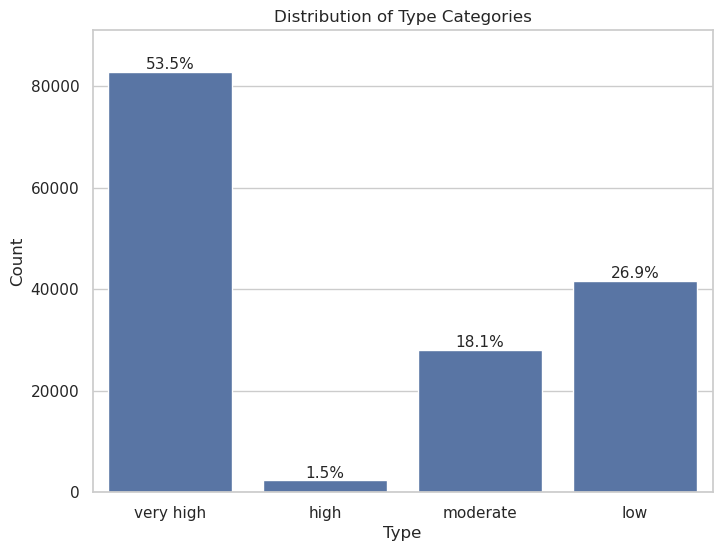

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Calculate counts and percentages
counts = collapsed_df['Type'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(2)

# Desired order
type_order = ['very high', 'high', 'moderate', 'low']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=collapsed_df, x='Type', order=type_order)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    label = p.get_x() + p.get_width() / 2
    category = p.get_x() + p.get_width() / 2
    type_name = p.get_x() + p.get_width() / 2
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

# Labels
plt.title('Distribution of Type Categories')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)  # Add some space above bars

plt.show()
